<h2>Steel plate problem with random position and radius</h2>

\begin{align*}
    \frac{E(x, \omega_1)}{2 (1 + \nu)} \cdot \nabla^2 u(x, \omega) + \frac{E(x, \omega_1)}{2 (1 - \nu)} \cdot \nabla(\nabla \cdot u(x, \omega)) + b = 0 \hspace{1cm} & | \: x \in D(\omega_2) \\
    u(x, \omega) = 0 \hspace{1cm} & | \: x \in \Gamma_1 \\
    \sigma(u, x) \cdot n(x) = g \hspace{1cm} & | \: x \in \Gamma_2
\end{align*}

with random position and radius perturbation function like this:

<img src="../../images/6_steel_plate_problem/perturbed_mesh_sample.png">

In [2]:
from helpers import *

In [ ]:
# Calculate random field E
mesh_resolution = 16 # with 20 it takes 5 min.
randomFieldE = calculate_randomFieldE(mesh_resolution=mesh_resolution)

In [11]:
# Time Analysis
mesh_resolutions = [8, 10, 12, 14, 16, 18, 20]
times = []
for mesh_resolution in mesh_resolutions:
    start = time.time()
    omega1 = sample_omega1(randomFieldE)
    omega2 = sample_omega2()
    q = sample_q()
    u_hat_sol_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE=randomFieldE)
    end = time.time()
    times.append(end - start)
# Clear console output
clear_output(wait=True)
for mesh_resolution, time_ in zip(mesh_resolutions, times):
    print(f"Mesh Resolution: {mesh_resolution}, Time: {time_:.2f} s")

Mesh Resolution: 8, Time: 6.11 s
Mesh Resolution: 10, Time: 9.78 s
Mesh Resolution: 12, Time: 13.86 s
Mesh Resolution: 14, Time: 19.16 s
Mesh Resolution: 16, Time: 25.98 s
Mesh Resolution: 18, Time: 32.76 s
Mesh Resolution: 20, Time: 39.32 s


Number of nodes: 73


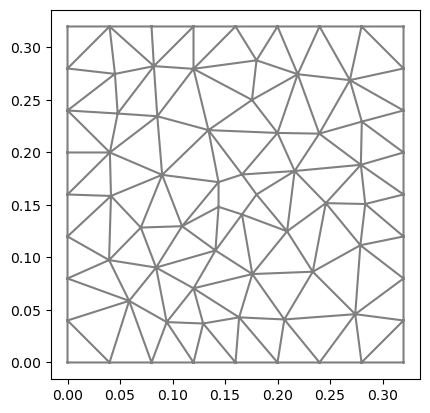

J: 109


In [ ]:
# Visualisation of the mesh and the number of nodes
mesh = create_reference_mesh(mesh_resolution = 14)
# Number of nodes
print(f"Number of nodes: {mesh.num_vertices()}")
fe.plot(mesh)
plt.show()

fine_u_hat_sols.shape: (1930, 1084)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]


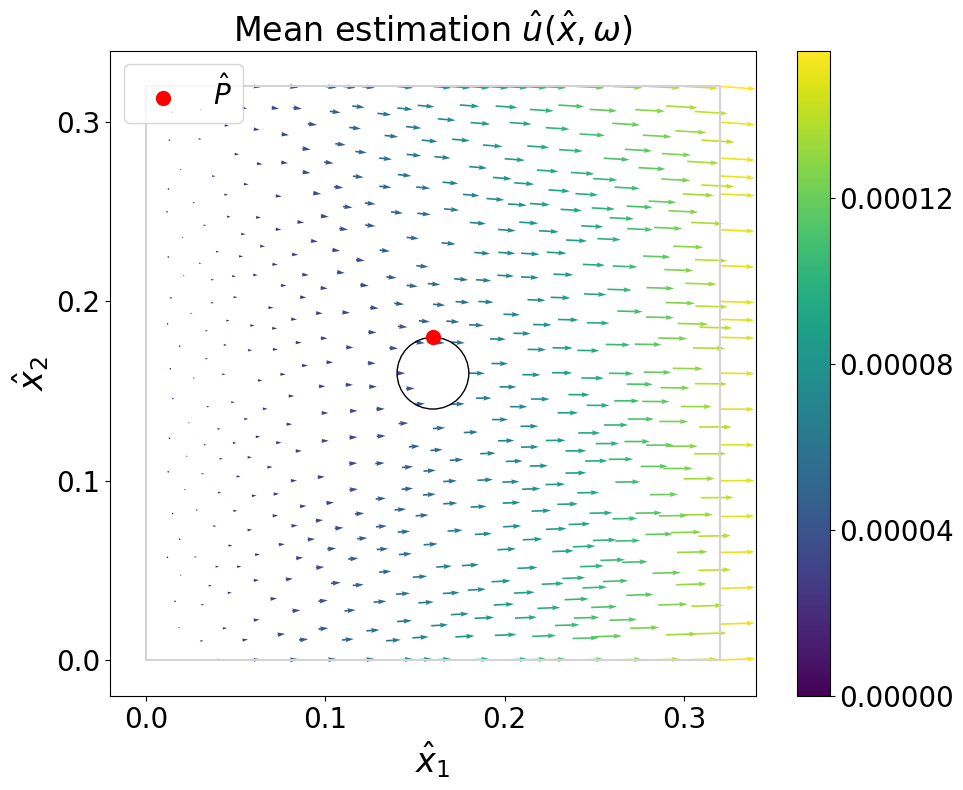

KeyboardInterrupt: 

In [ ]:
"""Monte Carlo Analysis û
Creation of image: images/6_steel_plate_problem/mc_u_hat_mean.png
Creation of image: images/6_steel_plate_problem/mc_u_hat_var.png
Creation of image: images/6_steel_plate_problem/mc_u_hat_errors.png"""

mc_analysis_u_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18)

fine_sigma_hat_proj.shape: (1730, 2168)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]
Object cannot be plotted directly, projecting to piecewise linears.


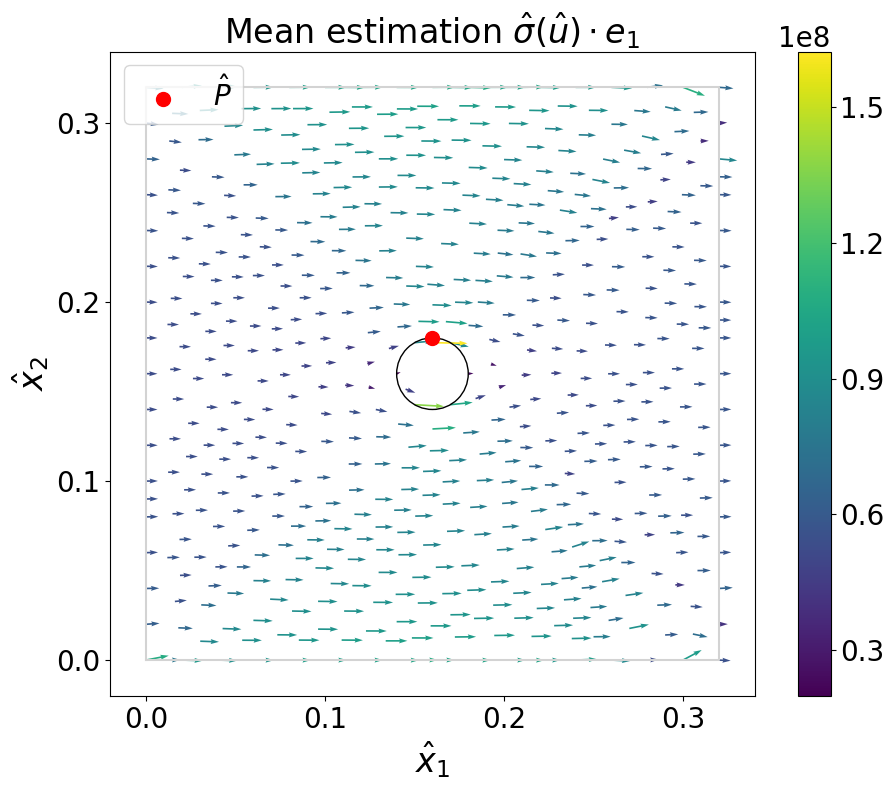

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1075: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=20)


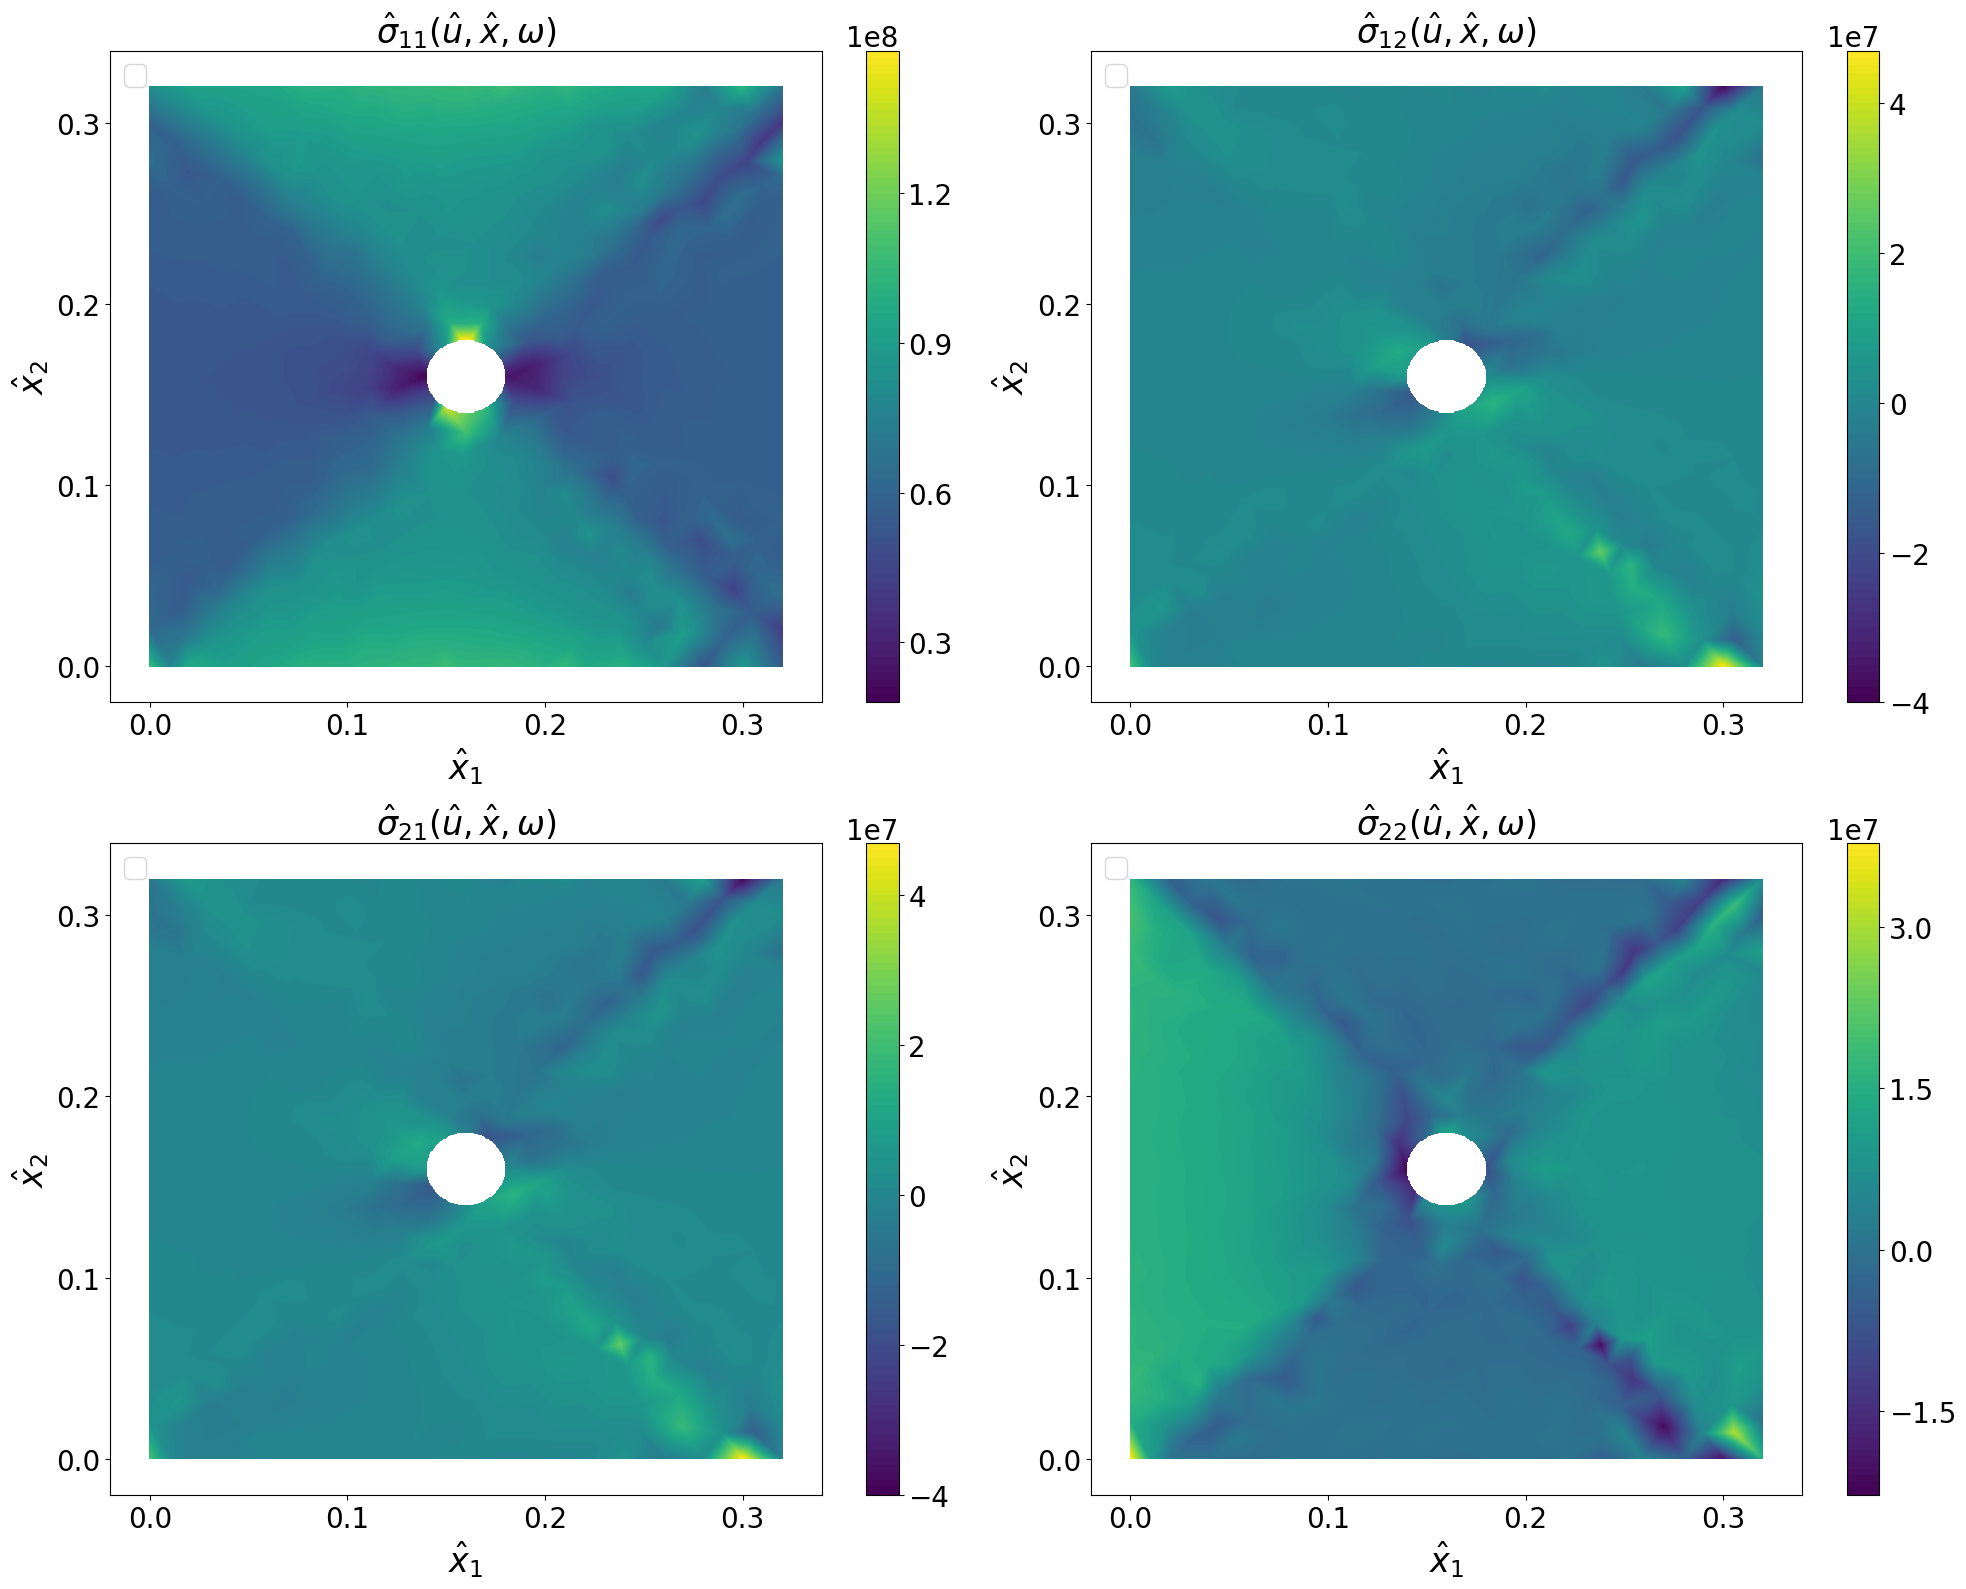

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1116: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(mc_sample_sizes, sparse_sigma_hat_proj_P_hat_means, 'bo', marker='x', linestyle='None', label='Means', markersize=10)


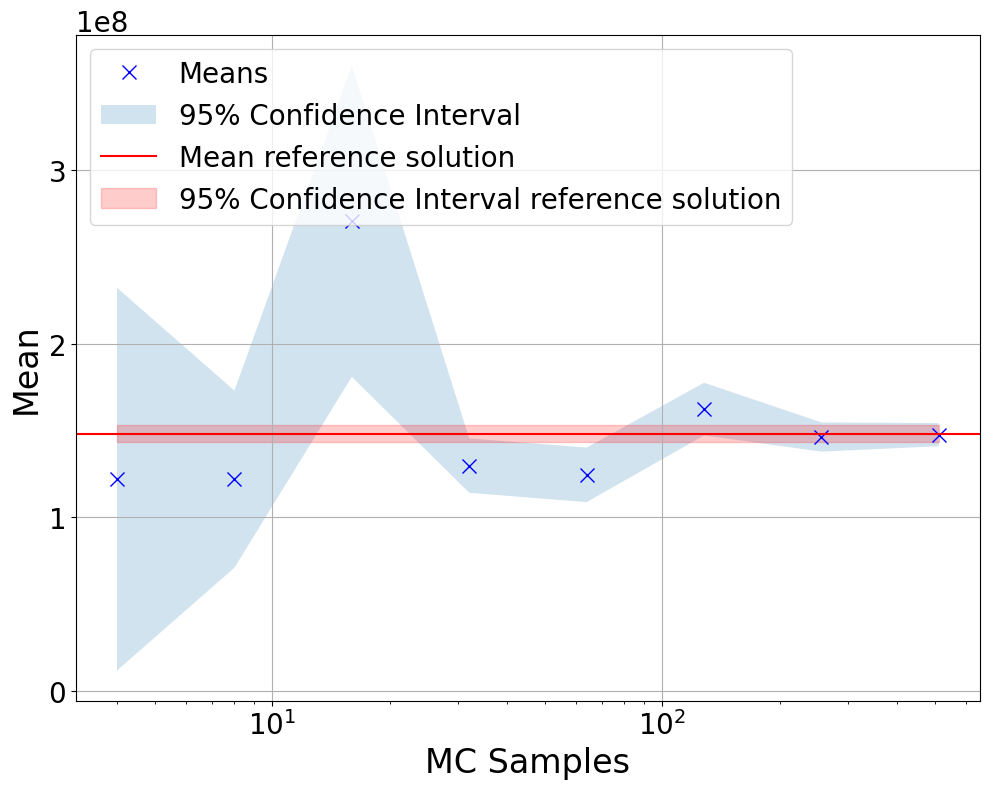

In [ ]:
"""Monte Carlo Analysis sigma_hat
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_mean_vectorized.png
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_first_component.png
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_convergence.png"""

mc_analysis_sigma_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18,
            P_hat=fe.Point(0.16, 0.18))

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


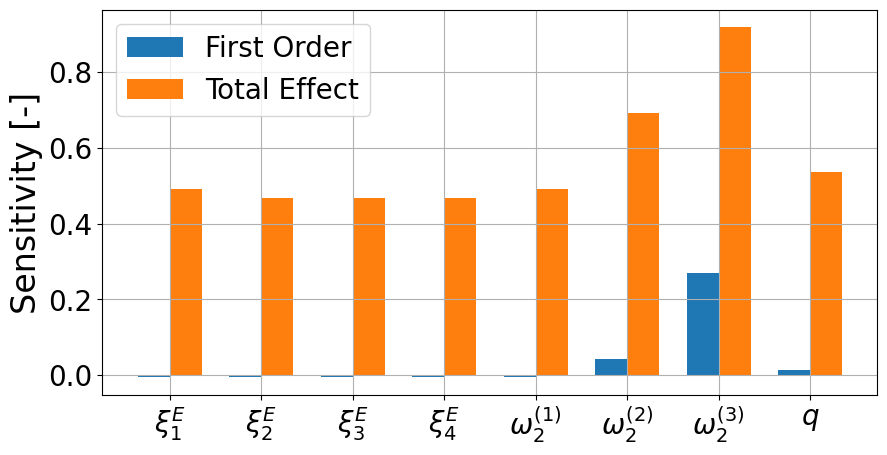

Sample size: 12000


In [4]:
"""Sobol Analysis of û
Creation of image: images/6_steel_plate_problem/sp_5_sobol_u_hat.png"""

S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_u_hat(fem_res=14, kl_res_e=14, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


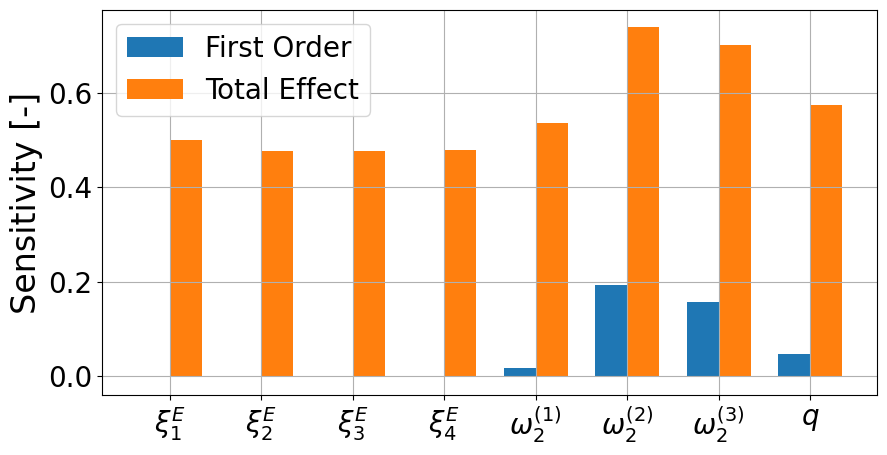

Sample size: 12000


In [5]:
"""Sobol Analysis of sigma_hat
Creation of image: images/6_steel_plate_problem/sp_5_sobol_sigma_hat.png"""

S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_sigma_hat(fem_res=14, kl_res_e=14, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)

In [ ]:
# Print eigenvalues of random field E for interpreting sobol results
randomFieldE = calculate_randomFieldE(14)
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldE.eigenvalues[i]}")

In [ ]:
"""Plot of solution sample without perturbation
Creation of image: images/6_steel_plate_problem/solution_sample_without_perturbation.png"""

plot_solution_sample_without_perturbation()

In [ ]:
""" Plot of solution sample with perturbation
Creation of image: images/6_steel_plate_problem/solution_sample_with_perturbation.png"""

plot_solution_sample_with_perturbation()

In [ ]:
"""Plot reference domain with coloured boundary points.
Creation of image: images/6_steel_plate_problem/reference_domain.png"""

plot_reference_domain()

In [ ]:
"""Plot perturbation function with projected points.
Creation of image: images/6_steel_plate_problem/perturbation_function.png"""

plot_perturbation_function()

In [ ]:
"""Plot perturbed mesh sample.
Creation of image: images/6_steel_plate_problem/perturbed_mesh_sample.png"""

plot_perturbed_mesh_sample()

In [ ]:
"""Plot the grid perturbation for the introduction.
Creation of image: images/1_introduction/steel_plate_grid_perturbation.png"""

plot_grid_perturbation_for_introduction()

In [ ]:
"""Plot random field Ê and E.
Creation of image: images/6_steel_plate_problem/random_field_E.png"""

plot_random_field_e()